In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import KMeans
colors = ['b','r','g','c','m','y']

In [139]:
df = pd.read_csv("brain_networks.csv")

In [140]:
print(f"Available Distance types are: {KMeans.KMeans.dist_types_built}")

Available Distance types are: ['Euclidean', 'Manhattan', 'Minkowski', 'Supremum']


In [141]:
# Plotting scatter for each iteration
def plot_scatter(ax,kmeans,new_cent):
    global colors
    points = kmeans.points
    for i in range(len(points)):
        ax.scatter(points[i].x,points[i].y,c=colors[new_cent[i]])
    for i in range(len(kmeans.centroids)):
        ax.scatter(kmeans.centroids[i].x,kmeans.centroids[i].y,c="k",marker="*")

In [145]:
# Creating an KMeans class instance
kmeans = KMeans.KMeans(df,3,"Euclidean")
curr_cent = kmeans.set_centroids()
print(f"Centroid points (wrt to dataset): {curr_cent}")

Centroid points (wrt to dataset): [17, 224, 466]


In [146]:
from matplotlib.animation import FuncAnimation, PillowWriter

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

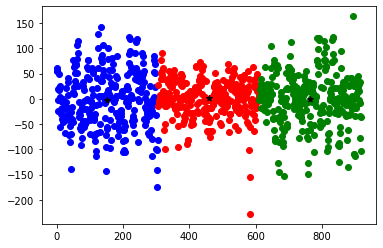

In [147]:
#classification = kmeans.kmeans_iter()
#print(classification)
all_cent = list()
kmeans_instances = list()
#all_cent.append(curr_cent)
#kmeans_instances.append(kmeans)

#i = 0
while True:
    new_cent = kmeans._kmeans_cluster()[0]
    #print(list(new_cent))
    #plot_scatter(ax,kmeans,list(new_cent))
    if new_cent == curr_cent:
        break
    #plt.savefig(f"{i}.png",dpi=300`)
    all_cent.append(new_cent)
    kmeans_instances.append(kmeans)
    curr_cent = new_cent
    #i+=1
    
fig, ax = plt.subplots(1,1)
print(all_cent)

def animate(i):
    global all_cent, kmeans_instances, ax
    ax.clear()
    plot_scatter(ax,kmeans_instances[i],all_cent[i])

ani = FuncAnimation(fig,animate,frames=len(kmeans_instances),interval=50,repeat=False)
ani.save("clustering2.gif",dpi=300,writer=PillowWriter(fps=1))